Getting Started With Image Processing with Python
Introduction to Python Imaging Library (PIL)
Exercise-1
1. Read and display the image.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

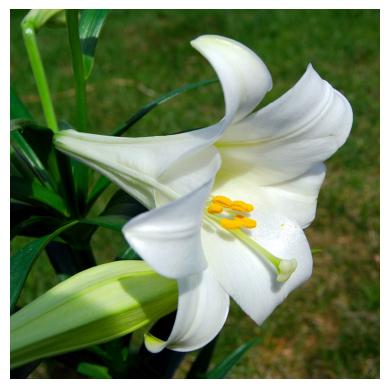

In [26]:
from PIL import Image

# Load the image using Pillow
image_path = "lily.jpg"  # Replace with your actual image path
img = Image.open(image_path)

# Display the image using Pillow
img.show()  

# Display the image using Matplotlib
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

2. Display only the top left corner of 100x100 pixels

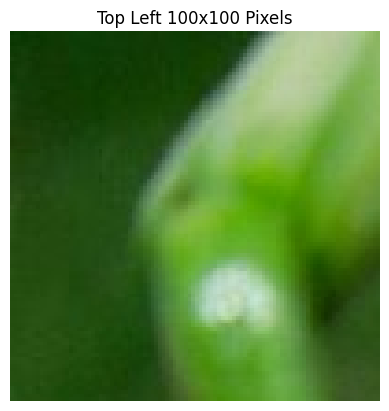

In [4]:

# Convert the image to a NumPy array
img_array = np.array(img)

# Extract the top-left 100x100 pixels
top_left_corner = img_array[:100, :100]  # Selecting first 100 rows and first 100 columns

# Convert back to an image
top_left_img = Image.fromarray(top_left_corner)

# Display using Matplotlib
plt.imshow(top_left_img)
plt.axis("off")  # Hide axes
plt.title("Top Left 100x100 Pixels")
plt.show()

3. Show the three color channels (R, G, B). 

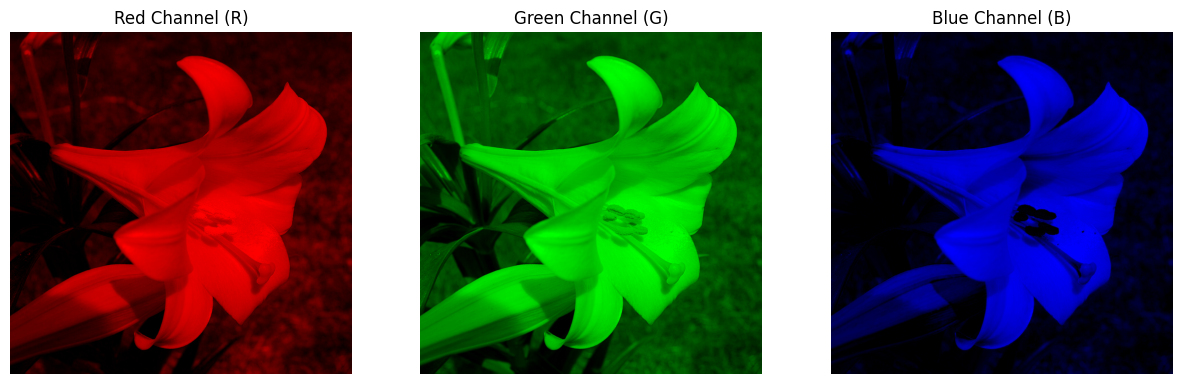

In [5]:


# Convert the image to a NumPy array
img_array = np.array(img)

# Extract individual color channels
red_channel = img_array.copy()
green_channel = img_array.copy()
blue_channel = img_array.copy()

# Keep only one color in each channel (set others to 0)
red_channel[:, :, 1:] = 0    # Keep only the Red channel, set Green & Blue to 0
green_channel[:, :, [0, 2]] = 0  # Keep only the Green channel, set Red & Blue to 0
blue_channel[:, :, :2] = 0   # Keep only the Blue channel, set Red & Green to 0

# Display the channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(red_channel)
axes[0].set_title("Red Channel (R)")
axes[0].axis("off")

axes[1].imshow(green_channel)
axes[1].set_title("Green Channel (G)")
axes[1].axis("off")

axes[2].imshow(blue_channel)
axes[2].set_title("Blue Channel (B)")
axes[2].axis("off")

plt.show()

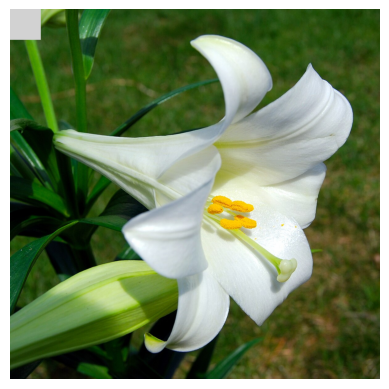

In [27]:


# Convert the image to a NumPy array
img_array = np.array(img)

# Modify the top-left 100x100 pixels to have a value of 210 (light gray)
img_array[:100, :100] = 210  # Sets all RGB channels to 210 (light gray)

# Convert back to an image
modified_img = Image.fromarray(img_array)

# Display the modified image
plt.imshow(modified_img)
plt.axis("off")  # Hide axes
plt.show()

Exercise-2
1. Load and display a grayscale image.

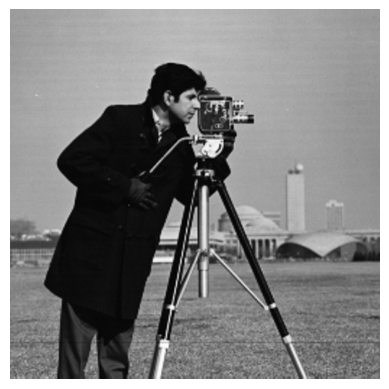

In [14]:
image_path = "cameraman.png"  # Replace with your actual image path
img = Image.open(image_path).convert("L")  # Convert to grayscale (mode 'L')

# Display the grayscale image using Matplotlib
plt.imshow(img, cmap="gray")  # Use cmap='gray' to ensure it's displayed in grayscale
plt.axis("off")  # Hide axes
plt.show()

2. Extract and display the middle section of the image.

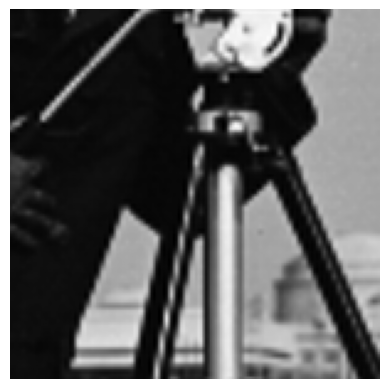

In [16]:
img_array = np.array(img)

# Get the dimensions of the image
height, width = img_array.shape

# Calculate the coordinates for the middle 150 pixels (centered)
start_x = (width - 150) // 2
end_x = start_x + 150
start_y = (height - 150) // 2
end_y = start_y + 150

# Extract the middle 150x150 section using slicing
middle_section = img_array[start_y:end_y, start_x:end_x]

# Display the cropped image using Matplotlib
plt.imshow(middle_section, cmap="gray")
plt.axis("off")  # Hide axes
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

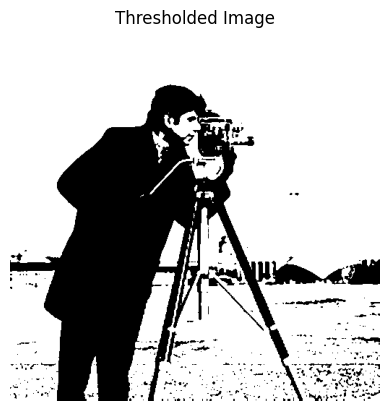

In [17]:

img = Image.open(image_path).convert("L")  # Convert to grayscale

# Convert grayscale image to a NumPy array
img_array = np.array(img)

# Apply threshold: set pixels <100 to 0 and ≥100 to 255
threshold_value = 100
binary_image = np.where(img_array < threshold_value, 0, 255).astype(np.uint8)

# Convert back to an image
binary_img = Image.fromarray(binary_image)

# Display the binary image
plt.imshow(binary_img, cmap="gray")
plt.axis("off")  # Hide axes
plt.title("Thresholded Image")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

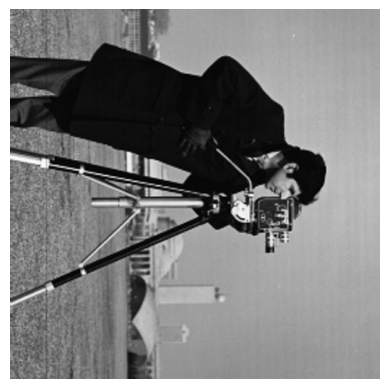

In [21]:
# Rotate the image 90 degrees clockwise using Pillow's rotate method
rotated_img = img.rotate(-90, expand=True)  # Negative for clockwise rotation

# Display the rotated image using Matplotlib
plt.imshow(rotated_img, cmap="gray")  # Display the rotated image
plt.axis("off")  # Hide axes
plt.show()


5. Convert the grayscale image to an RGB image.

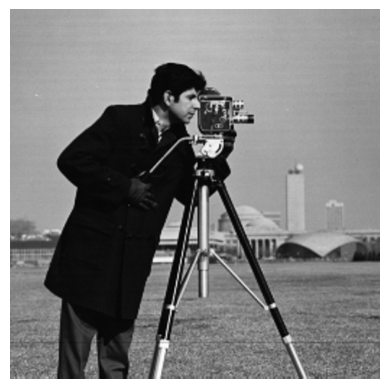

In [23]:
# Convert the grayscale image to an RGB image by replicating the grayscale values across all channels
rgb_img = np.stack([img_array] * 3, axis=-1)  # Stack the grayscale image along the last dimension (R, G, B)

# Convert the NumPy array back to a Pillow image
rgb_img_pil = Image.fromarray(rgb_img.astype(np.uint8))

# Display the converted RGB image
plt.imshow(rgb_img_pil)
plt.axis("off")  # Hide axes
plt.show()


3. Image Compression and Decompression using PCA
   1. Load and Prepare Data
      • Fetch an image of you choice.{If colour convert to grayscale}
      • Center the dataset - Standaridze the Data.
      • Calculate the covaraince matrix of the Standaridze data.


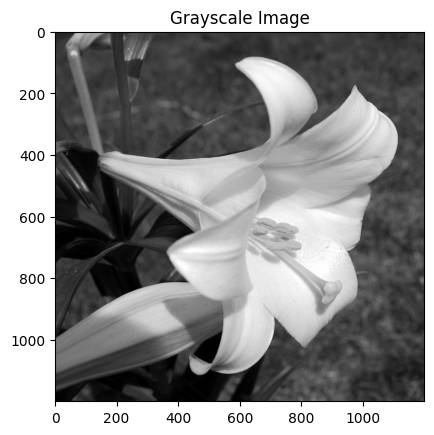

Covariance Matrix:
 [[ 0.18402694  0.1815831   0.1785514  ... -0.02385956 -0.02470241
  -0.02549774]
 [ 0.1815831   0.18312222  0.18190356 ... -0.02413472 -0.02502347
  -0.02591396]
 [ 0.1785514   0.18190356  0.18365281 ... -0.02438368 -0.02527885
  -0.0262175 ]
 ...
 [-0.02385956 -0.02413472 -0.02438368 ...  0.03415839  0.03406741
   0.03392232]
 [-0.02470241 -0.02502347 -0.02527885 ...  0.03406741  0.03448666
   0.03474674]
 [-0.02549774 -0.02591396 -0.0262175  ...  0.03392232  0.03474674
   0.03566455]]


In [24]:
# Step 1: Load an image (replace with your image path)
image_path = "lily.jpg"  
img = Image.open(image_path)

# Step 2: Convert the image to grayscale
gray_img = img.convert('L')

# Step 3: Optional: Visualize the grayscale image using matplotlib
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Convert grayscale image to numpy array for further processing 
gray_array = np.array(gray_img)

mean = np.mean(gray_array)
std_dev = np.std(gray_array)
standardized_data = (gray_array - mean) / std_dev

# Calculate the covariance matrix 
cov_matrix = np.cov(standardized_data, rowvar=False)

# Print covariance matrix
print("Covariance Matrix:\n", cov_matrix)


2. Eigen Decomposition and Identifying Principal Components:
   • Compute Eigen Values and Eigen Vectors.
   • Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding      to the highest eigenvalues.
   • Identify the Principal Components with the help of cumulative Sum plot.


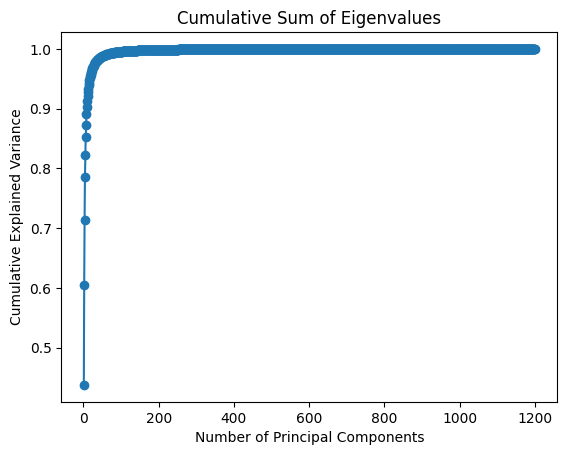

In [39]:

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select top k eigenvectors 
k = 5
top_k_eigenvectors = sorted_eigenvectors[:, :k]

# Cumulative sum of eigenvalues
cumulative_sum = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Plot the cumulative sum
plt.plot(range(1, len(cumulative_sum) + 1), cumulative_sum, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Sum of Eigenvalues')
plt.show()


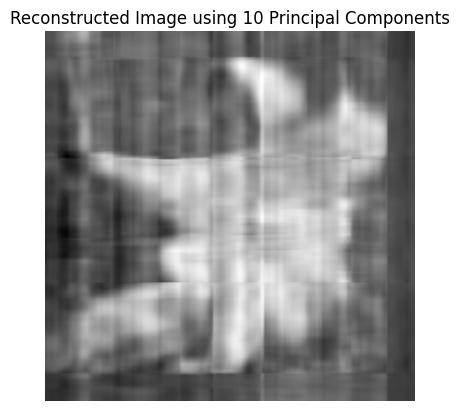

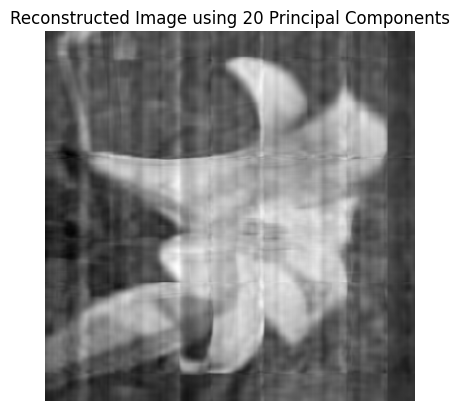

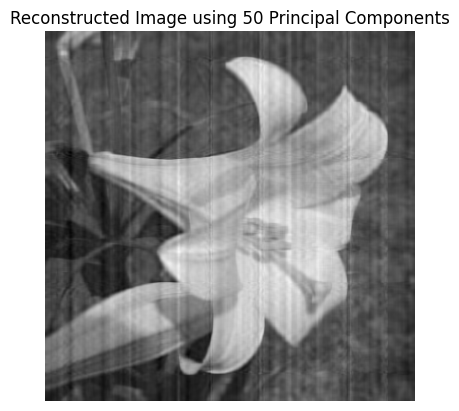

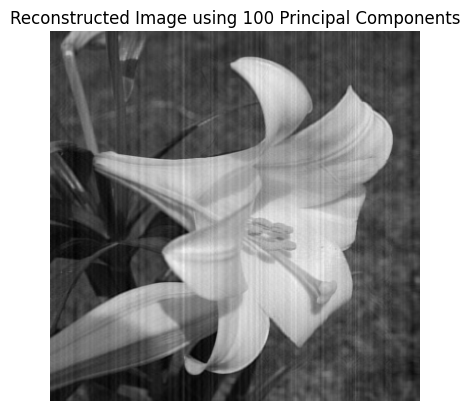

Reconstruction error with 100 principal components: 58.79280670751527


In [43]:
# Project the standardized data (now gray_img) onto the top k eigenvectors
reduced_data = np.dot(gray_array, top_k_eigenvectors)

# Pick different combinations of principal components
k_values = [10, 20, 50, 100]

for k in k_values:
    top_k_eigenvectors = sorted_eigenvectors[:, :k]
    reduced_data = np.dot(gray_array, top_k_eigenvectors)
    
    # Reconstruct the image (by projecting back to the original space)
    reconstructed_image = np.dot(reduced_data, top_k_eigenvectors.T)
    
    # Display the reconstructed image
    plt.imshow(reconstructed_image.reshape(gray_array.shape), cmap='gray')
    plt.title(f'Reconstructed Image using {k} Principal Components')
    plt.axis('off')
    plt.show()

# Compute reconstruction error (mean squared error)
reconstruction_error = np.mean((gray_array - reconstructed_image) ** 2)
print(f'Reconstruction error with {k} principal components: {reconstruction_error}')
